# Exercise 6

In this exercise, we will put in practice a popular clustering technique: k-means.

Remember that k-means is a two steps process. After initialization:  
1) assign each point to its closest cluster  
2) move each cluster to the average position of the points assigned to it  

Note that K-means requires you to specify the desired number of clusters k, which should be, in practice, determined from an apriori knowledge about the data or via cross-validation (not covered in this homework).

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from collections import Counter
np.random.seed(42)

%matplotlib inline

### TODO

Complete the two methods `assign_points` and `compute_centroids` below. Specifically:  

*  `assign_points(X, centroids)` assigns each data points in X to its closest centroid (in terms of Euclidean distance). The output is a list of indices, where each index is in the range [0,...,K-1], K being the number of clusters.
*  `compute_centroids(X, labels, num_clusters)` re-compute the position of each centroid. The new position of a centroid is computed as the mean of the data points that are assigned to it (recall that assignement is represented by the `labels` array).


In [127]:
"""
Generate random 2D data points
"""
def gen_data(num_samples,num_blobs=3,random_state=42):
    X, y = make_blobs(n_samples=num_samples, random_state=random_state, centers=num_blobs, cluster_std=10.0)
    return X,y

"""
Compute euclidean distance between a point and a centroid.
point,centroid: 1D Numpy array containing coordinates [x,y]
"""
def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid)**2))

def init_centroids(X,num_clusters):
    rand_indices = np.random.choice(X.shape[0], num_clusters,replace=False)
    return X[rand_indices,:]

In [128]:

"""
Assign objects to their closest cluster center according to the Euclidean distance function.
"""
def assign_points(X, centroids):
    labels = []
    cent_num = 0
    for point in range(0, X.shape[0]):
        # Hint: you can use the function euclidean_distance(...) 
        #       to compute the distance between a point and 
        #       a centroid.
        min_dist = euclidean_distance(X[point],centroids[0])
        i_min = 0
        for i in range(1,len(centroids)):
            dist = euclidean_distance(X[point],centroids[i])
            if dist < min_dist:
                min_dist = dist
                i_min = i
        labels.append(i_min) 

    return np.array(labels)

"""
Update the position of a centroid according to the average position of the points
of that cluster.
"""
def compute_centroids(X, labels, num_clusters):
    centroids = np.zeros((num_clusters,2))
    c = dict(Counter(labels))
    print(c)
    for num_c in range(num_clusters):
        amount = 0
        x_av = 0
        y_av = 0
        for i in range(len(labels)):
            if num_c == labels[i]:
                amount += 1
                x_av += X[i][0]
                y_av += X[i][1]
        print(x_av/amount,y_av/amount)
        centroids [num_c][0] = x_av/amount
        centroids [num_c][1] = y_av/amount

    return centroids


In [129]:
"""
Runs one instance of k-means
X:            input data of shape Mx2, M the number of examples
num_clusters: number of clusters to compute
"""
def k_means(X, num_clusters):

    # Initialize centroids to randomly chosen data points
    centroids  = init_centroids(X,num_clusters)
    
    # Bookkeeping
    num_iter  = 0
    positions = [centroids]
    
    while True:
        
        labels = assign_points(X, centroids)
        
        new_centroids = compute_centroids(X, labels, num_clusters)

        num_iter += 1
        
        # Termination criterion
        if np.all(centroids == new_centroids):
            break
        if num_iter >100:
            break
            
        centroids = new_centroids
        positions.append(centroids)
        
    return [labels, centroids, num_iter, positions]

In [130]:
num_samples = 150
num_blobs   = 3
X,y = gen_data(num_samples,num_blobs=num_blobs)

total_iterations = 10
num_clusters     = 3
[cluster_label, new_centroids, num_iter, positions] = k_means(X,num_clusters)
print("Convergence in %i iteration(s)" % num_iter)

{1: 37, 2: 27, 0: 86}
1.624875753856719 -4.897644587064803
-1.7234420913534219 16.588904773882984
-13.87550585307483 1.3847907472970578
{1: 38, 2: 45, 0: 67}
3.7857095094293465 -5.743648718951917
1.482913100935738 15.881844757869086
-13.525776345527634 0.25101679319713216
{1: 42, 2: 49, 0: 59}
4.377429009370359 -6.459794201105433
1.8921471383200716 14.920026670469756
-12.987861060075783 -0.31697693819165906
{1: 48, 2: 50, 0: 52}
4.2672440323986445 -7.728970915672132
2.5744047906274434 13.721898882424215
-12.882696404325321 -0.5352653283658665
{1: 50, 2: 53, 0: 47}
4.4091807184285114 -8.767602463574725
2.9140093453375364 13.348514934361935
-12.294314370083697 -0.47862336994276694
{1: 53, 2: 54, 0: 43}
3.974996008880001 -9.773048186820768
3.4839868400303566 12.776458983485634
-12.11560799046052 -0.4987011438579137
{1: 52, 2: 55, 0: 43}
3.974996008880001 -9.773048186820768
3.703929372882951 12.82747719422003
-12.039924660966776 -0.30556999532782486
{1: 52, 2: 55, 0: 43}
3.974996008880001 

### Plotting

With the following code you can plot the result of the clustering procedure.  

Cluster centroids are displayed as red circles. Their positions across the various steps of the optimization are displayed as red lines. Data points are colored according to their cluster assignement.

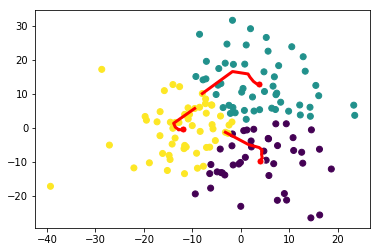

In [131]:
A = plt.scatter(X[:, 0], X[:, 1], c=cluster_label)
B = plt.scatter(new_centroids[:,0], new_centroids[:,1], marker='o', s=50, c='r', edgecolors='w', linewidths=1)

plt.plot(np.array(positions)[:,0,0],np.array(positions)[:,0,1],'r',linewidth=3)
plt.plot(np.array(positions)[:,1,0],np.array(positions)[:,1,1],'r',linewidth=3)
plt.plot(np.array(positions)[:,2,0],np.array(positions)[:,2,1],'r',linewidth=3)

## Pen and Paper

Consider a set P of points as shown below:  
<img src="ex2.png" width="400">

#### Question 2.1

Recall that the DBSCAN algorithm classifies each data point into one of 3 types: core ,  border , and  noise . The classification is based on two parameters, a distance  r and a threshold  t . Set  r = 1 and  t = 3. What are the types of a, b, c in the figure, respectively?  

#### Question 2.2
Set  r  = 1 and   t  = 3, and consider the point set  P  in Question 2.  
1) Are points  d and  e  connected? If so, show that there is a point  p that can
reach both  d   and  e.  
2) How about points  f  and  g ?  

#### Question 2.3  
Set  r  = 1 and  t  = 3. Show the output of DBSCAN on the point set  P in Question 2 (i.e., what are the points in each of the clusters returned?).